# Pymaceuticals Inc.
---

### Analysis

    - The distribution of male mice to female mice is 51% male and 49% female, this gives a realistic public sample size.
    - The drug 'Propriva' had the least number of mice tested. To figure out why this was the case, more data digging would need to be done, but a potential hypothesis would be that mice being given this injection were not surviving long and the tumors or the medication were killing them faster than other injections. 
    - The correlation between the mouse weight and the average tumor volume of a mouse taking 'Capomulin' is 0.84 which on Pearson's Correlation Coefficient strength scale is a strong correlation.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete_df = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview

mouse_study_complete_df.head()


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [2]:
# Checking the number of mice.
mouse_count = mouse_study_complete_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_find = mouse_study_complete_df[mouse_study_complete_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
# pull unique values into a single array to return
duplicate_mice = duplicate_find["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_complete_df[mouse_study_complete_df["Mouse ID"] == "g989"]

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
107      g989     Propriva  Female          21          26          0   
137      g989     Propriva  Female          21          26          0   
329      g989     Propriva  Female          21          26          5   
360      g989     Propriva  Female          21          26          5   
620      g989     Propriva  Female          21          26         10   
681      g989     Propriva  Female          21          26         10   
815      g989     Propriva  Female          21          26         15   
869      g989     Propriva  Female          21          26         15   
950      g989     Propriva  Female          21          26         20   
1111     g989     Propriva  Female          21          26         20   
1195     g989     Propriva  Female          21          26         25   
1380     g989     Propriva  Female          21          26         30   
1592     g989     Propriva  Female          21          26         35   

      Tumor Volume (mm3)  Metastatic Sites  
107            45.000000                 0  
137            45.000000                 0  
329            48.786801                 0  
360            47.570392                 0  
620            51.745156                 0  
681            49.880528                 0  
815            51.325852                 1  
869            53.442020                 0  
950            55.326122                 1  
1111           54.657650                 1  
1195           56.045564                 1  
1380           59.082294                 1  
1592           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = mouse_study_complete_df[mouse_study_complete_df["Mouse ID"]!= "g989"].drop_duplicates(keep="last")
clean_mouse_data_df.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     b128    Capomulin  Female           9          22          0   
1     f932     Ketapril    Male          15          29          0   
2     g107     Ketapril  Female           2          29          0   
3     a457     Ketapril  Female          11          30          0   
4     c819     Ketapril    Male          21          25          0   

   Tumor Volume (mm3)  Metastatic Sites  
0                45.0                 0  
1                45.0                 0  
2                45.0                 0  
3                45.0                 0  
4                45.0                 0

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_data_df["Mouse ID"].nunique()
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = clean_mouse_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_mouse_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_mouse_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_dev = clean_mouse_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEM_tumor_vol = clean_mouse_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

regimen_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Variance Tumor Volume": variance,
                          "Standard Dev. Tumor Volume": standard_dev, "Standard Err. Tumor Volume": SEM_tumor_vol})
regimen_df

Mean Tumor Volume  Median Tumor Volume  Variance Tumor Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Dev. Tumor Volume  Standard Err. Tumor Volume  
Drug Regimen                                                          
Capomulin                       4.994774                    0.329346  
Ceftamin                        6.268188                    0.469821  
Infubinol                       6.567243                    0.492236  
Ketapril                        8.279709                    0.603860  
Naftisol                        8.134708                    0.596466  
Placebo                         7.821003                    0.581331  
Propriva                        6.622085                    0.544332  
Ramicane                        4.846308                    0.320955  
Stelasyn                        7.710419                    0.573111  
Zoniferol                       6.966589                    0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_regimen_df = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])

agg_regimen_df                           

mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

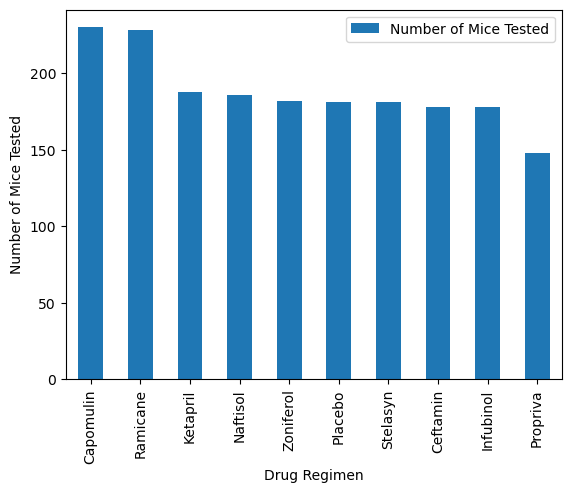

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_df = pd.DataFrame({"Number of Mice Tested": clean_mouse_data_df.groupby("Drug Regimen").count()["Timepoint"]})
regimen_df = regimen_df.sort_values("Number of Mice Tested", ascending=False)
regimen_df.plot.bar()
plt.ylabel("Number of Mice Tested")

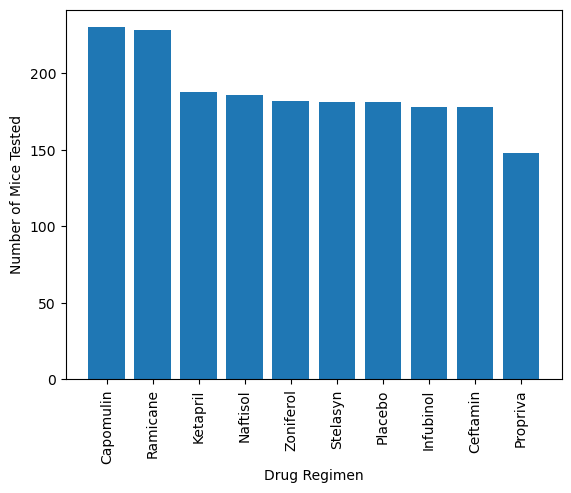

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

regimen_ply_df = clean_mouse_data_df["Drug Regimen"].value_counts()

plt.bar(regimen_ply_df.index.values, regimen_ply_df.values)  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()

In [11]:
gender_counts = clean_mouse_data_df["Sex"].value_counts()
gender_counts

Male      958
Female    922
Name: Sex, dtype: int64

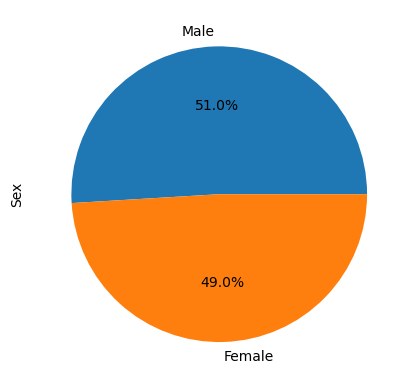

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

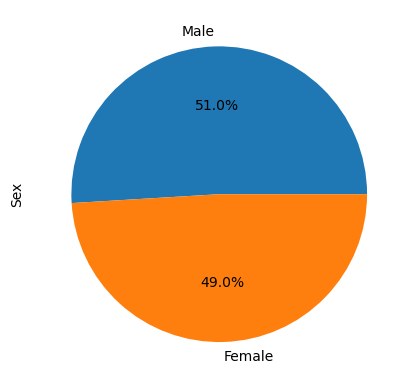

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_counts.values,labels=gender_counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_mouse_data_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = max_tumor.merge(clean_mouse_data_df,on=["Mouse ID","Timepoint"],how="left")
merged_data

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


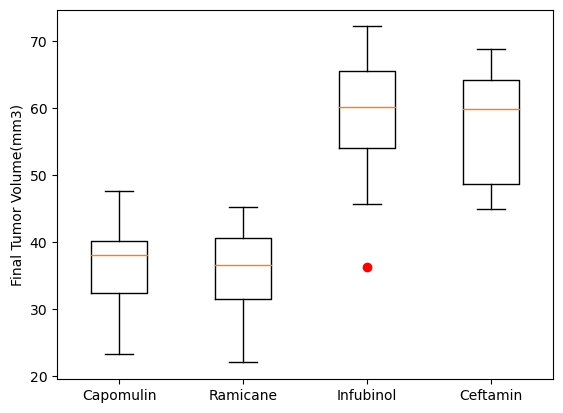

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol_list, labels=treatment_list, sym="red")
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

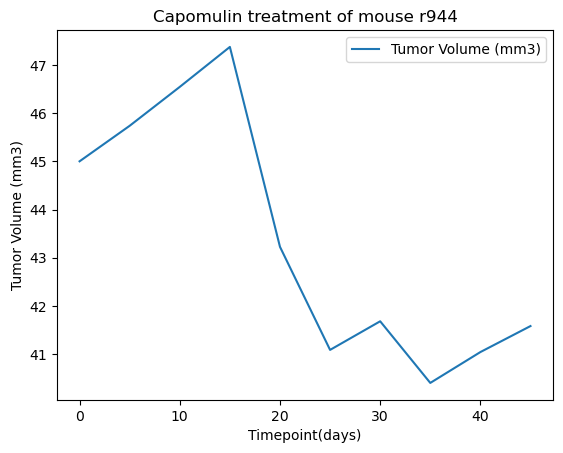

In [17]:
# Generate a line plot of tumor volume vs. time point for one mouse treated with Capomulin

# filtering by "Drug Regimen"
capomulin_data = clean_mouse_data_df[clean_mouse_data_df ["Drug Regimen"] == "Capomulin"]

# pick a random mouse for the plot function
cap_sample = capomulin_data.sample()
mouse_id = cap_sample["Mouse ID"].item()
cap_plot_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

cap_plot_data.plot.line(x="Timepoint", y="Tumor Volume (mm3)")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.show()

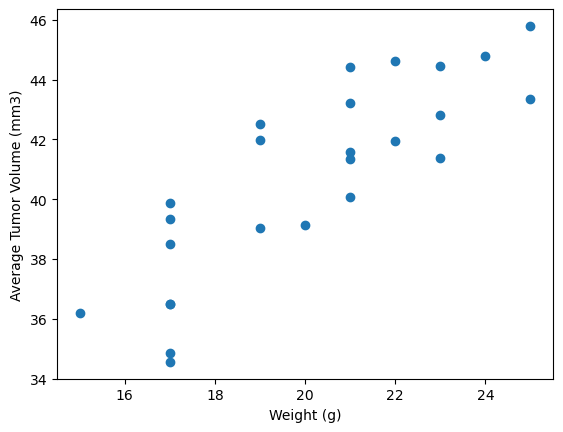

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data

scatter_mean = capomulin_data.groupby(["Mouse ID"], as_index=False).mean()
scatter_mean

weight = scatter_mean["Weight (g)"]
avg_tumor_vol = scatter_mean["Tumor Volume (mm3)"]

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


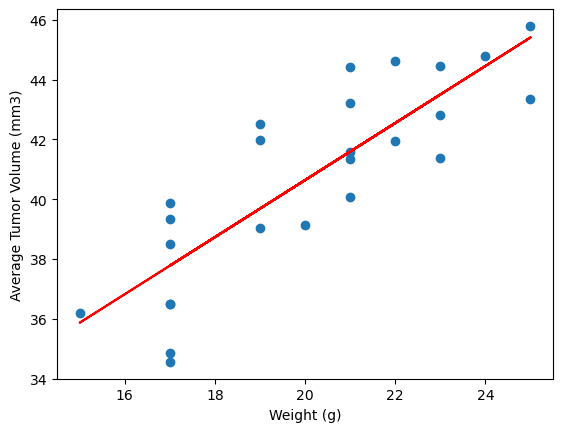

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(weight,avg_tumor_vol)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = weight * slope + intercept
plt.plot(weight,regress_values,"r-")

plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
plt.show()